# 152-333	Electrical Engineering Laboratory 3 
# ปฏิบัติการทางวิศวกรรมไฟฟ้า 3

[*ศึกษาเพิ่ม*](https://www.youtube.com/watch?v=fI9Q_haTnVI&t=87s)

<iframe width="420" height="315"
src="https://www.youtube.com/watch?v=fI9Q_haTnVI&t=87s">
</iframe>


In [ ]:
!pip -q install -U control

     |████████████████████████████████| 256kB 2.8MB/s eta 0:00:01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as co

plt.rcParams['figure.figsize'] = [23,10]
plt.rcParams['font.size'] = 24


# 1.Transfer Function

The transfer function of a component is represented by a block. Block has single input and single output.

The following figure shows a block having input X(s), output Y(s) and the transfer function G(s).

![ข้อความแสดงแทน](https://www.tutorialspoint.com/control_systems/images/block.jpg)
<br>  
# $G(s)=\frac{Y(s)}{X(s)}$

# $G\left( s \right) = {{{a_m}{s^m} + {a_{m - 1}}{s^{m - 1}} +  \ldots  + {a_1}{s^1} + {a_0}} \over {{b_m}{s^n} + {b_{m - 1}}{s^{n - 1}} +  \ldots  + {b_1}{s^1} + {b_0}}}$
<br>
where output  $Y(s)=G(s)X(s)$


# ตัวอย่าง 1.1 จงหาค่าของ

# ${{2s + 5} \over {s + 2}}$




In [ ]:
G1 = co.tf([2,5],[1,2])
G1


2 s + 5
-------
 s + 2

#ตัวอย่าง 1.2. จงหาค่าของ
#${{2s + 5} \over {{s^4} - 2{s^3} + 8s + 4}}$

In [ ]:
G2 = co.tf([2,5],[1,-2,0,8,10])
G2


        2 s + 5
----------------------
s^4 - 2 s^3 + 8 s + 10

#ตัวอย่าง 1.3. จงหาค่าของ

#${{5s + 1} \over {10{s^2} + 2s + 20}}$

In [ ]:
G3 = co.tf([5,1],[10,2,20])
G3


     5 s + 1
-----------------
10 s^2 + 2 s + 20

#ตัวอย่าง 1.4 จงหาค่าของ

#${{5\left( {s + 2} \right)\left( {s - 5} \right)} \over {12\left( {s + 4} \right)\left( {s + 5} \right)\left( {s + 9} \right)}}$




In [ ]:
G4 = 5*co.tf( np.poly([-2,5]), 12*np.poly([-4,-5,-9])   )
G4


        5 s^2 - 15 s - 50
--------------------------------
12 s^3 + 216 s^2 + 1212 s + 2160

#2.การหา Pole ของระบบ



In [ ]:
co.pole(G4)

array([-9., -5., -4.])

#3.การหา Zero ของระบบ

In [ ]:
co.zero(G4)

array([ 5., -2.])

#4. Plot a pole/zero map for a linear system.

(array([-9., -5., -4.]), array([ 5., -2.]))

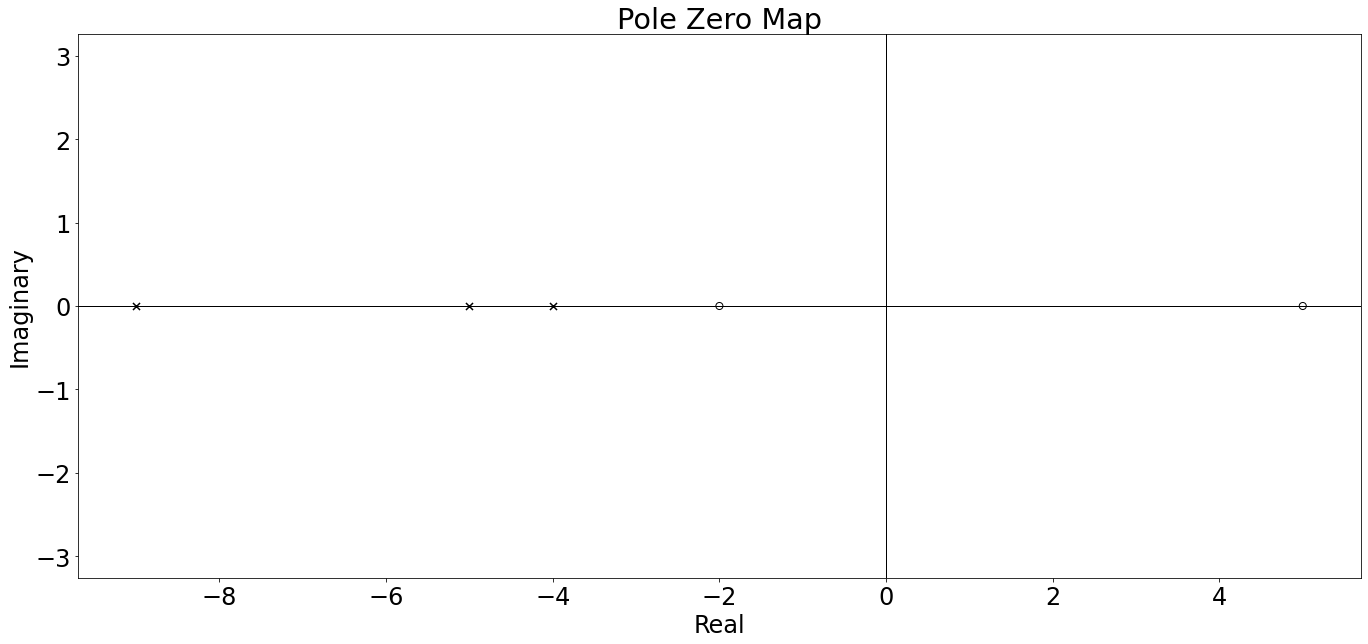

In [ ]:
co.pzmap(G4)

# ตัวอย่าง 4.1

จงหาค่า pole และ Zero ของระบบ พร้อมทั้งทำการ Plot
#${{2s + 5} \over {{s^5} - 2{s^3} + 8s + 4}}$

In [ ]:
G = co.tf([2,5],[1,0,-2,0,8,4])
G


       2 s + 5
---------------------
s^5 - 2 s^3 + 8 s + 4

In [ ]:
co.zero(G)

array([-2.5])

In [ ]:
co.pole(G)

array([ 1.48773549+1.00223241j,  1.48773549-1.00223241j,
       -1.22154726+0.91802896j, -1.22154726-0.91802896j,
       -0.53237646+0.j        ])

(array([ 1.48773549+1.00223241j,  1.48773549-1.00223241j,
        -1.22154726+0.91802896j, -1.22154726-0.91802896j,
        -0.53237646+0.j        ]), array([-2.5]))

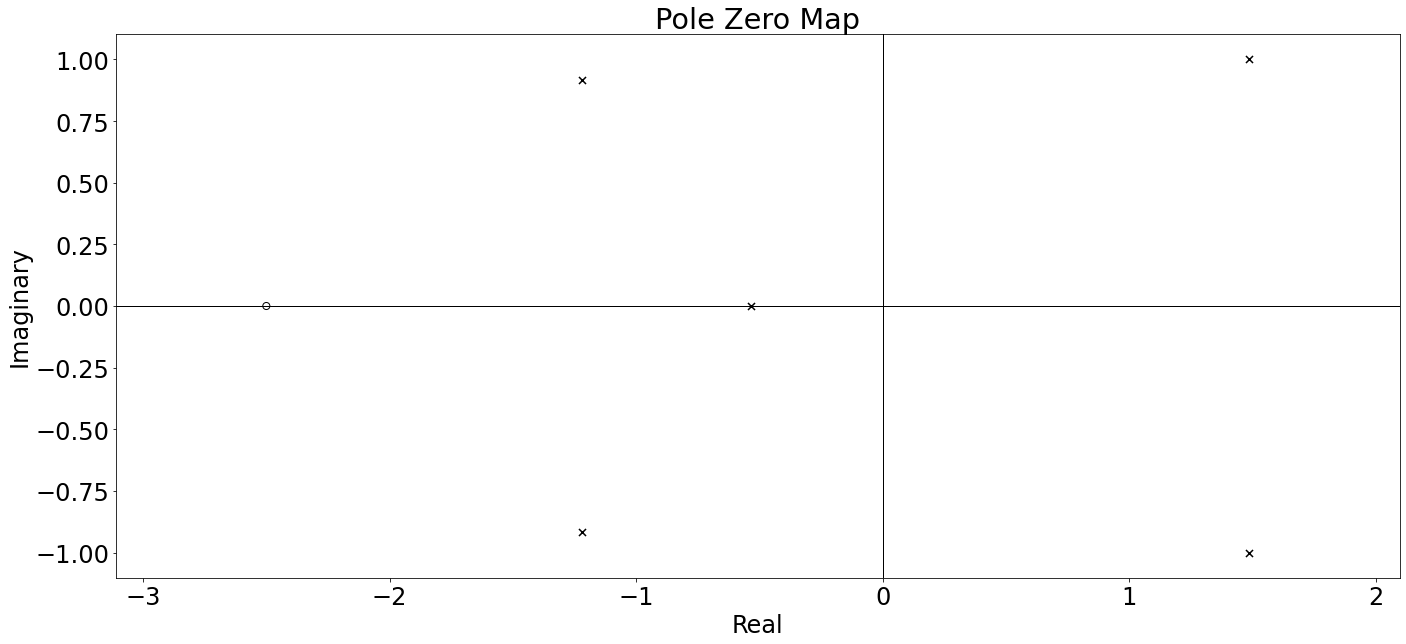

In [ ]:
co.pzmap(G)

#ตัวอย่าง 4.2

จงหาค่า pole และ Zero ของระบบ พร้อมทั้งทำการ Plot
#${(2s + 5)(s^{2}+s-1) \over { (s^{3}-9s^{2} +23s-15)(s-4)(s-8)(s+9)  } }$

In [ ]:
 num = np.polymul( [2,5] ,[1,1,-1]   )
 num


array([ 2,  7,  3, -5])

In [ ]:
den =np.polymul( [1,-9,23,-15], np.poly([4,8,-9]) )
den

array([ 1.000e+00, -1.200e+01, -2.600e+01,  8.880e+02, -4.295e+03,
        7.764e+03, -4.320e+03])

In [ ]:
G = co.tf(num,den)
G


                  2 s^3 + 7 s^2 + 3 s - 5
----------------------------------------------------------
s^6 - 12 s^5 - 26 s^4 + 888 s^3 - 4295 s^2 + 7764 s - 4320

(array([-9.,  8.,  5.,  4.,  3.,  1.]),
 array([-2.5       , -1.61803399,  0.61803399]))

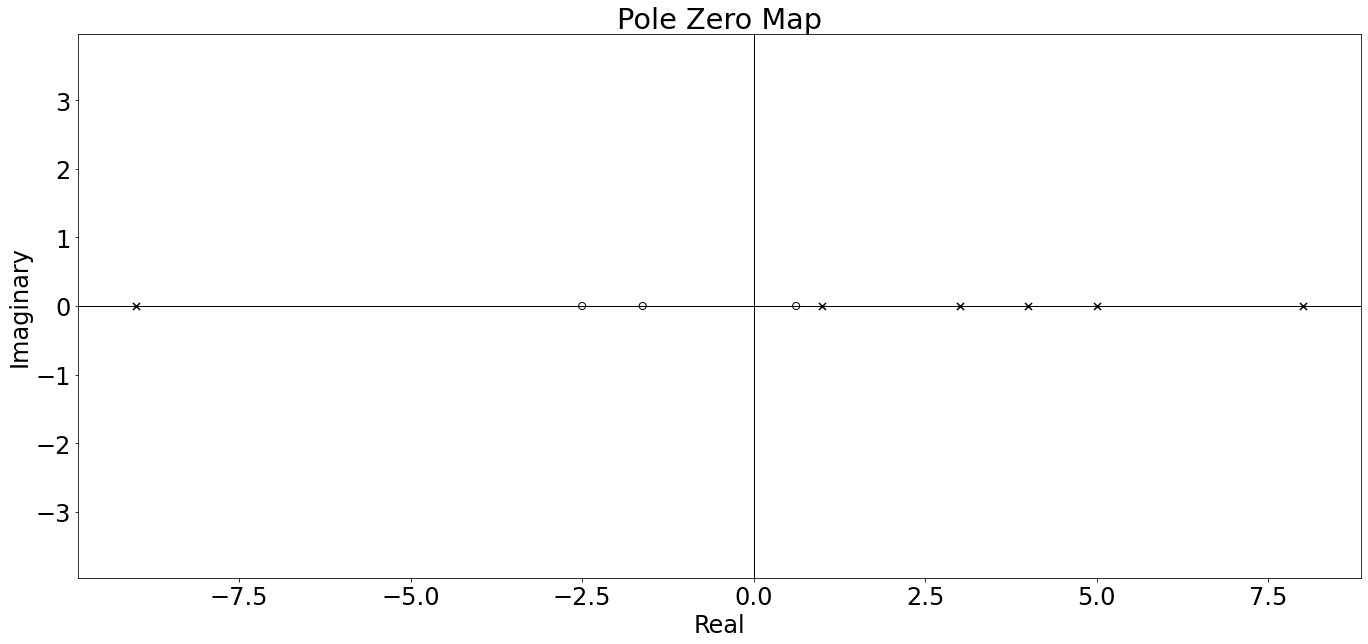

In [ ]:
co.pzmap(G)

#5.Minreal : Eliminates uncontrollable or unobservable states in state-space models or cancelling pole-zero pairs in transfer functions.



In [ ]:
G4


        5 s^2 - 15 s - 50
--------------------------------
12 s^3 + 216 s^2 + 1212 s + 2160

In [ ]:
co.minreal(G4)

0 states have been removed from the model



0.4167 s^2 - 1.25 s - 4.167
---------------------------
s^3 + 18 s^2 + 101 s + 180

#6. Algebra of Control System

In [ ]:
G5 = G1*G2
G5


       4 s^2 + 20 s + 25
-------------------------------
s^5 - 4 s^3 + 8 s^2 + 26 s + 20

In [ ]:
G6 = G1/G2
G6


2 s^5 + s^4 - 10 s^3 + 16 s^2 + 60 s + 50
-----------------------------------------
            2 s^2 + 9 s + 10

In [ ]:
G7 = G1*G3 + 1/(G1+G2)
G7


s^11 + 2 s^10 - 8 s^9 + 16 s^8 + 228 s^7 + 392 s^6 - 248 s^5 + 225 s^4 + 7578 s^3 + 1.923e+04 s^2 + 2.010e+04 s + 8300
----------------------------------------------------------------------------------------------------------------------
    2 s^11 + 5 s^10 - 16 s^9 - 6 s^8 + 229 s^7 + 312 s^6 - 424 s^5 - 164 s^4 + 3794 s^3 + 8208 s^2 + 7080 s + 2400